# Train Data

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv',index_col=0)

In [3]:
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0             8.0              0.50         0.39             2.2      0.073   
1             9.3              0.30         0.73             2.3      0.092   
2             7.1              0.51         0.03             2.1      0.059   
3             8.1              0.87         0.22             2.6      0.084   
4             8.5              0.36         0.30             2.3      0.079   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                        
0                  30.0                  39.0  0.99572  3.33       0.77   
1                  30.0                  67.0  0.99854  3.32       0.67   
2                   3.0                  12.0  0.99660  3.52       0.73   
3                  11.0                  65.0  0.99730  3.20       0.53   
4                  10.0                  45.0  0.99444  3.20       1.36   

    alcohol  quality  
Id                    
0      12.1        6  
1      12.8        6  
2      11.3        7  
3       9.8        5  
4       9.5        6

In [ ]:
# train.describe(include='all').fillna('-')

In [5]:
X,Y=train.iloc[:,:-1],train.quality

In [6]:
Y.value_counts()

5    839
6    778
7    333
4     55
8     39
3     12
Name: quality, dtype: int64

# Distribution

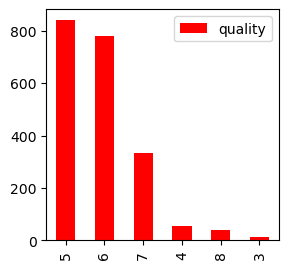

In [7]:
x=pd.DataFrame(Y.value_counts())
x.plot(kind='bar',label=True,color=['red'],figsize=(3,3))
plt.show()

In [8]:
import plotly.express as exp

fig=exp.bar(data_frame=x,x=x.index,y=x.quality,width=400, height=250)
fig.update_layout(xaxis=dict(title='Class'),hovermode='x')


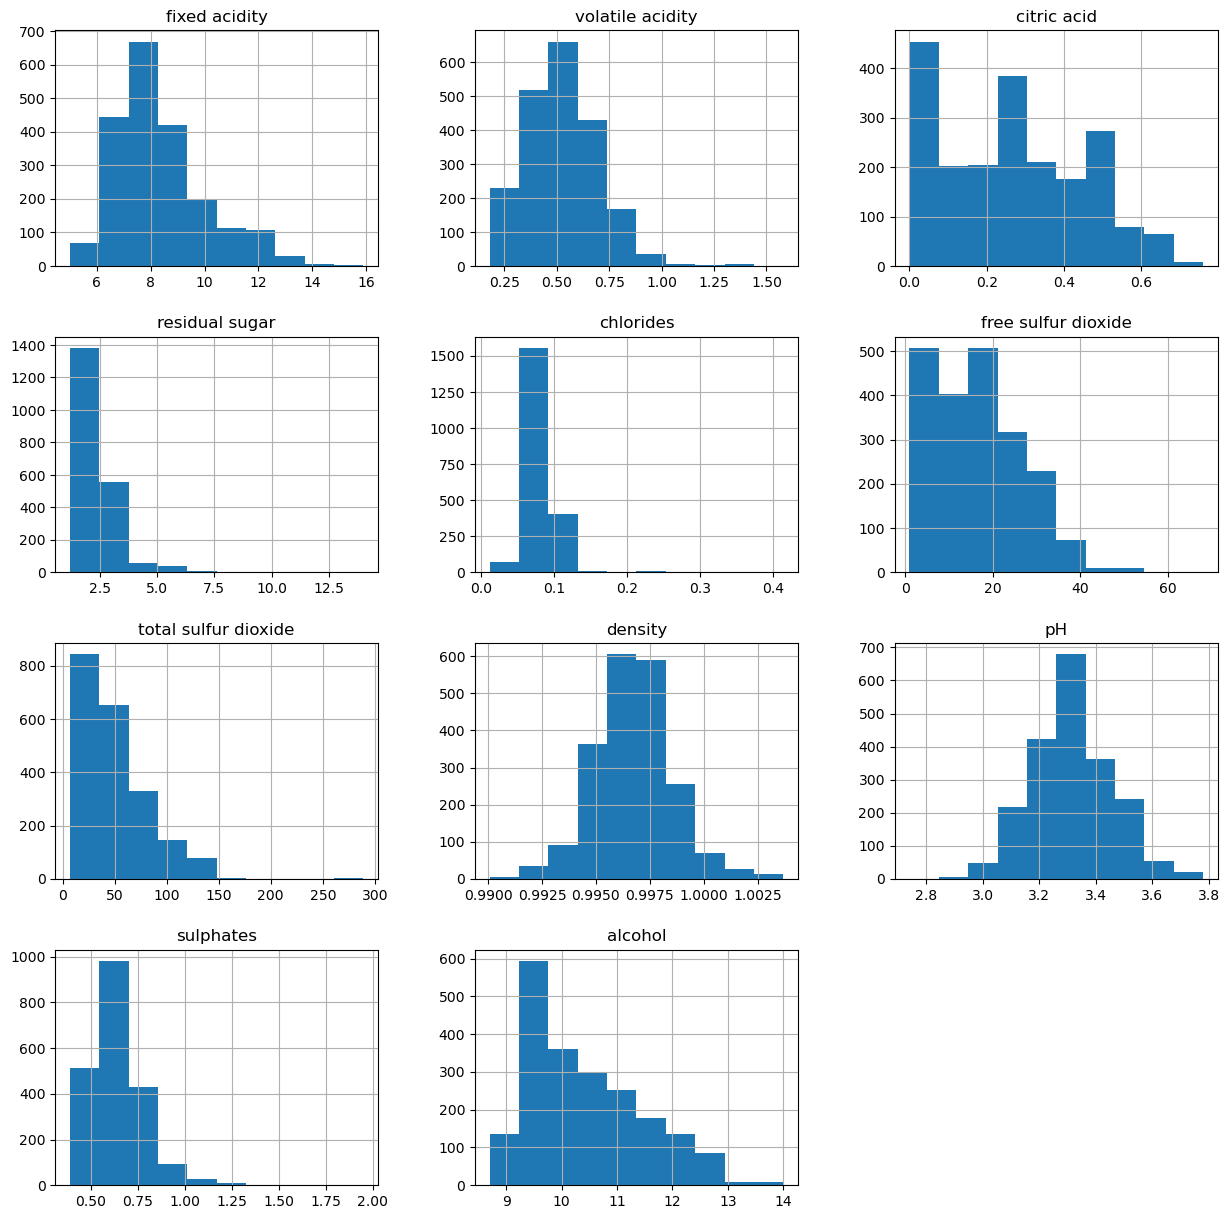

In [9]:
X.hist(figsize=(15,15))
plt.show()

# Outlier Detection

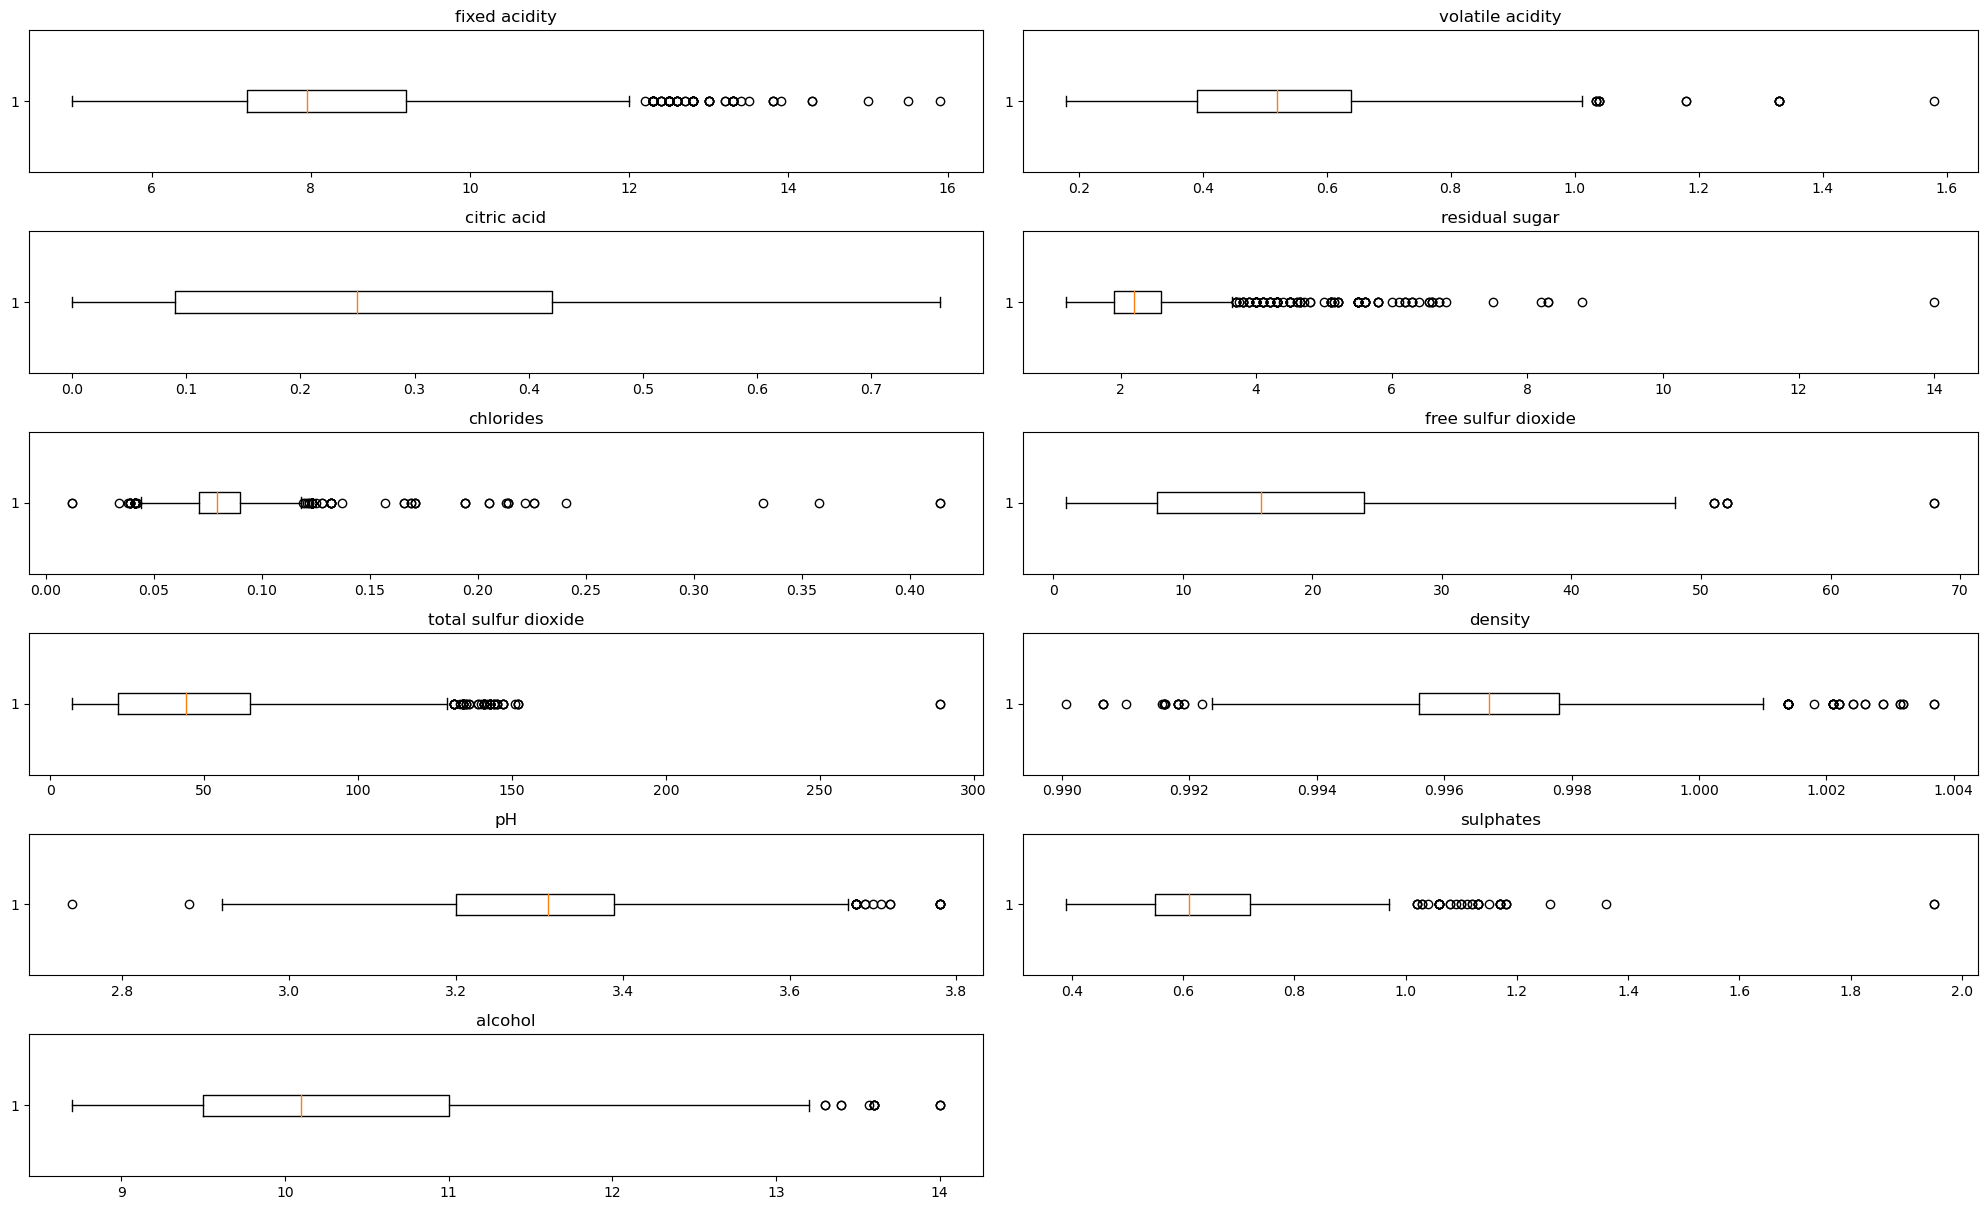

In [10]:
plt.figure(figsize=(20,20))

out={}
x=1

for i,j in enumerate(X.columns):
  if X[j].dtypes!='O':
    plt.subplot(10,2,x)
    box=plt.boxplot(X[j],vert=False)
    outlier=[item.get_ydata() for item in box['fliers']]
    out[j]=outlier
    plt.title(j)
    x+=1
plt.tight_layout()

In [11]:
from sklearn.ensemble import IsolationForest

iso=IsolationForest()

X['Anomaly']=iso.fit_predict(X)
pos=list(X[X['Anomaly']==-1].index)

X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0             8.0              0.50         0.39             2.2      0.073   
1             9.3              0.30         0.73             2.3      0.092   
2             7.1              0.51         0.03             2.1      0.059   
3             8.1              0.87         0.22             2.6      0.084   
4             8.5              0.36         0.30             2.3      0.079   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                        
0                  30.0                  39.0  0.99572  3.33       0.77   
1                  30.0                  67.0  0.99854  3.32       0.67   
2                   3.0                  12.0  0.99660  3.52       0.73   
3                  11.0                  65.0  0.99730  3.20       0.53   
4                  10.0                  45.0  0.99444  3.20       1.36   

    alcohol  Anomaly  
Id                    
0      12.1        1  
1      12.8       -1  
2      11.3        1  
3       9.8        1  
4       9.5        1

In [12]:
X['Anomaly'].value_counts()

 1    1893
-1     163
Name: Anomaly, dtype: int64

In [13]:
# drping outliers and reset index
train2=train.copy()
train2.drop(pos,inplace=True)
train2.reset_index(inplace=True)
train2.index.name='Id'
train2.drop('Id',axis=1,inplace=True)
train2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0             8.0              0.50         0.39             2.2      0.073   
1             7.1              0.51         0.03             2.1      0.059   
2             8.1              0.87         0.22             2.6      0.084   
3             8.5              0.36         0.30             2.3      0.079   
4             9.9              0.51         0.44             2.2      0.111   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                        
0                  30.0                  39.0  0.99572  3.33       0.77   
1                   3.0                  12.0  0.99660  3.52       0.73   
2                  11.0                  65.0  0.99730  3.20       0.53   
3                  10.0                  45.0  0.99444  3.20       1.36   
4                  30.0                 134.0  0.99820  3.11       0.54   

    alcohol  quality  
Id                    
0      12.1        6  
1      11.3        7  
2       9.8        5  
3       9.5        6  
4       9.6        5

In [14]:
print('Before ',train.shape)
print(f'After {train2.shape}')

Before  (2056, 12)
After (1893, 12)


In [15]:
train2.reset_index(inplace=True)
train2.index.name='Id'
train2.drop('Id',axis=1,inplace=True)
train2.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0             8.0              0.50         0.39             2.2      0.073   
1             7.1              0.51         0.03             2.1      0.059   
2             8.1              0.87         0.22             2.6      0.084   
3             8.5              0.36         0.30             2.3      0.079   
4             9.9              0.51         0.44             2.2      0.111   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                        
0                  30.0                  39.0  0.99572  3.33       0.77   
1                   3.0                  12.0  0.99660  3.52       0.73   
2                  11.0                  65.0  0.99730  3.20       0.53   
3                  10.0                  45.0  0.99444  3.20       1.36   
4                  30.0                 134.0  0.99820  3.11       0.54   

    alcohol  quality  
Id                    
0      12.1        6  
1      11.3        7  
2       9.8        5  
3       9.5        6  
4       9.6        5

# Skewness removal

In [16]:
X.skew()

fixed acidity           0.959832
volatile acidity        0.668343
citric acid             0.246571
residual sugar          3.756802
chlorides               5.262627
free sulfur dioxide     0.681219
total sulfur dioxide    1.267906
density                 0.202606
pH                      0.216976
sulphates               1.802854
alcohol                 0.786872
Anomaly                -3.116693
dtype: float64

In [17]:
# Skewness removal`
train3=train2.copy()

In [18]:
train3.skew()

fixed acidity           0.970142
volatile acidity        0.421669
citric acid             0.247227
residual sugar          2.550356
chlorides               4.743258
free sulfur dioxide     0.571789
total sulfur dioxide    0.969638
density                 0.144769
pH                      0.153424
sulphates               1.012470
alcohol                 0.831360
quality                 0.270927
dtype: float64

In [19]:
X,Y=train3.iloc[:,:-1],train3[['quality']]

In [20]:
X_transformed=pd.DataFrame(np.sqrt(X),columns=X.columns)
X_transformed.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                            
0        2.828427          0.707107     0.624500        1.483240   0.270185   
1        2.664583          0.714143     0.173205        1.449138   0.242899   
2        2.846050          0.932738     0.469042        1.612452   0.289828   
3        2.915476          0.600000     0.547723        1.516575   0.281069   
4        3.146427          0.714143     0.663325        1.483240   0.333167   

    free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
Id                                                                             
0              5.477226              6.244998  0.997858  1.824829   0.877496   
1              1.732051              3.464102  0.998299  1.876166   0.854400   
2              3.316625              8.062258  0.998649  1.788854   0.728011   
3              3.162278              6.708204  0.997216  1.788854   1.166190   
4              5.477226             11.575837  0.999100  1.763519   0.734847   

     alcohol  
Id            
0   3.478505  
1   3.361547  
2   3.130495  
3   3.082207  
4   3.098387

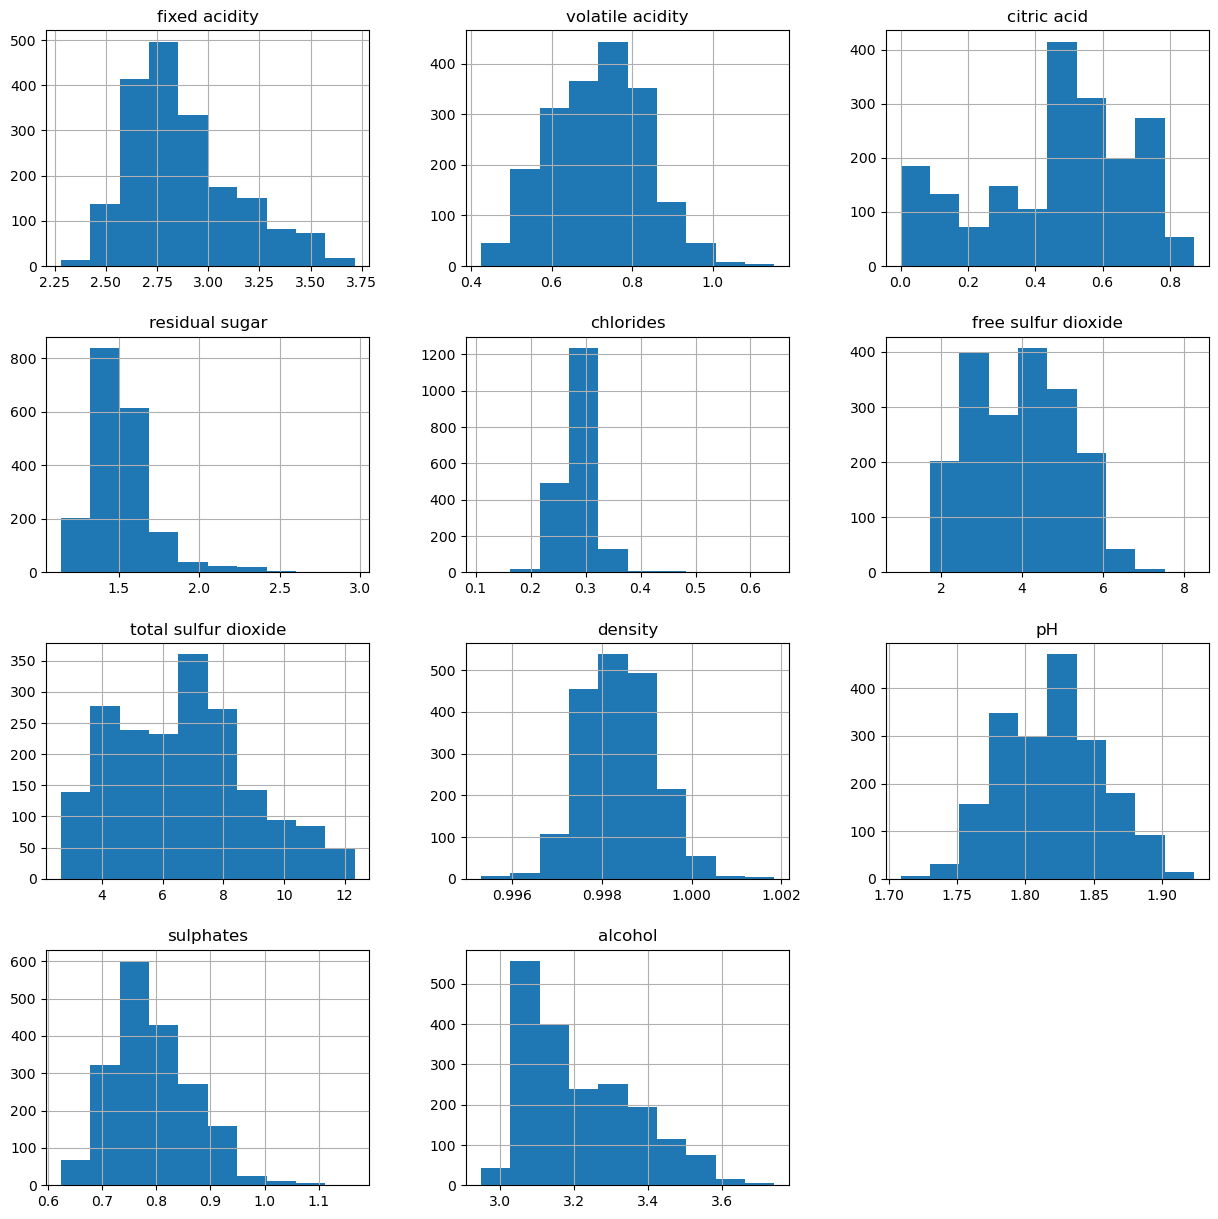

In [21]:
X_transformed.hist(figsize=(15,15))
plt.show()

In [22]:
X_transformed.skew()

fixed acidity           0.761112
volatile acidity        0.021088
citric acid            -0.624882
residual sugar          1.690585
chlorides               1.808586
free sulfur dioxide     0.048068
total sulfur dioxide    0.357716
density                 0.141805
pH                      0.103371
sulphates               0.707795
alcohol                 0.747759
dtype: float64

# Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
np.unique(Y,return_counts=True)

C:\Users\Slmss\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([ 12,  50, 789, 719, 290,  33], dtype=int64))

# Class Imbalance

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
# Generating synthetic data using SMOTE
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X_transformed, Y)

In [34]:
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

In [38]:
np.unique(y_resampled,return_counts=True)

array([789, 789, 789, 789, 789, 789], dtype=int64)

In [36]:
x=y_resampled.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [40]:
import plotly.express as exp

fig=exp.bar(x=np.unique(y_resampled,return_counts=True)[0],y=np.unique(y_resampled,return_counts=True)[1], height=450)
fig.update_layout(xaxis=dict(title='Class'),hovermode='x')


## DBSCAN noisy points

In [ ]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN()

In [ ]:
dbscan.fit(X_transformed)
# x_scl['Group']=dbscan.fit_predict(x_scl)
# x_scl.head()

In [ ]:
# x_scl.Group.value_counts()
# # Overall DBSACN useless

In [ ]:
# x_scl.drop('Group',axis=1,inplace=True)
# x_scl.head()

# DR

## TSNE

In [41]:
reduction_data=X_transformed.copy()

In [42]:
from sklearn.manifold import TSNE

In [43]:
tsne=TSNE()
tsne_df=pd.DataFrame(tsne.fit_transform(X_resampled),columns=['a','b'])

In [2]:
import matplotlib.pyplot as plt
plt.subplots()

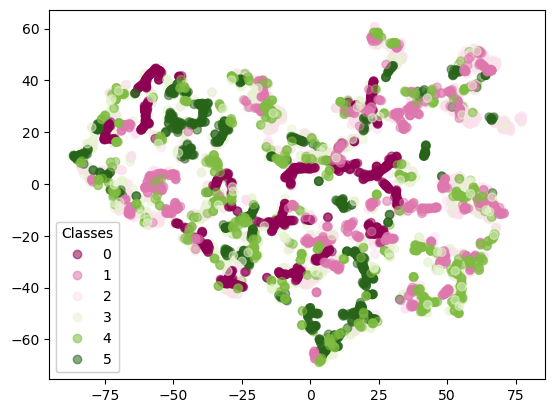

In [44]:
# Distribution
fig, ax = plt.subplots()

scatter = ax.scatter(tsne_df.a, tsne_df.b, c=y_resampled,alpha=.5,cmap='PiYG')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# # produce a legend with a cross section of sizes from the scatter
# handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
# legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

In [45]:
# On scaled Data
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_scl=pd.DataFrame(std.fit_transform(X_resampled),columns=X_resampled.columns)
x_scl.shape

(4734, 11)

In [46]:
tsne=TSNE()
tsne_df2=pd.DataFrame(tsne.fit_transform(x_scl),columns=['a','b'])

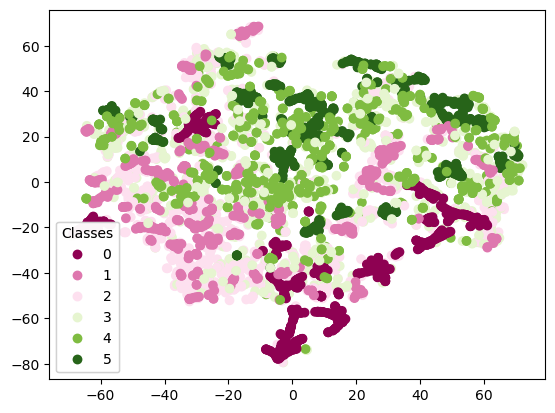

In [48]:

fig, ax = plt.subplots()

scatter = ax.scatter(tsne_df2.a, tsne_df2.b, c=y_resampled,alpha=1,cmap='PiYG')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# # produce a legend with a cross section of sizes from the scatter
# handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
# legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

## Feature selection

In [ ]:
reduction_data

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_resampled,y_resampled)

In [ ]:
X_resampled.columns

In [ ]:
dtc.feature_importances_

In [ ]:
X_transformed.columns

## PCA

In [49]:
from sklearn.decomposition import PCA

pca=PCA()

In [50]:
pca.fit(X_resampled)

PCA()

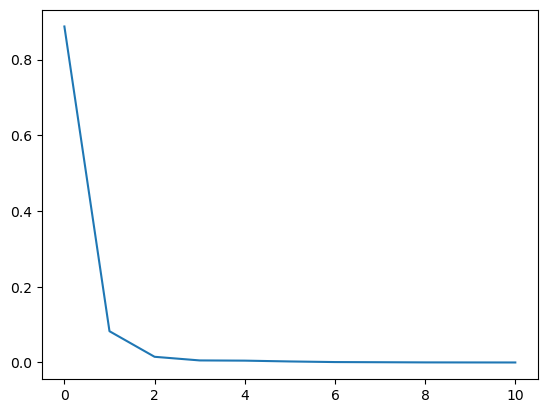

In [51]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)

In [52]:
import numpy as np

np.cumsum(pca.explained_variance_ratio_)

array([0.88737693, 0.96995319, 0.98496686, 0.99038809, 0.99523712,
       0.99794482, 0.99903431, 0.99970792, 0.99990961, 0.99999996,
       1.        ])

In [53]:
pcs=PCA(2)
final_X=pd.DataFrame(pcs.fit_transform(X_resampled),columns=('PC1','PC2'))

In [54]:
final_X

PC1       PC2
0     0.634193 -1.502149
1    -3.500235  0.557271
2     1.318530  1.232985
3     0.028907  0.777582
4     5.408914  0.902601
...        ...       ...
4729 -1.698873  0.956549
4730 -2.465474 -0.187661
4731 -0.541614 -0.319489
4732 -2.492523 -0.179751
4733 -1.548355 -0.014918

[4734 rows x 2 columns]

# Model Building

## XGB

In [55]:
from xgboost import XGBRFClassifier
xgb=XGBRFClassifier()

In [56]:
y_resampled.shape

(4734,)

In [57]:
final_X.shape

(4734, 2)

In [58]:
from sklearn.model_selection import cross_val_score,KFold
score=cross_val_score(xgb,final_X,y_resampled)

In [59]:
score

array([0.43083421, 0.44561774, 0.43189018, 0.42344245, 0.45137421])

In [60]:
score.mean()

0.43663175801630166

In [61]:
xgb=XGBRFClassifier()
xgb.fit(final_X,y_resampled)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
                grow_policy='depthwise', importance_type=None,
                interaction_constraints='', max_bin=256, max_cat_threshold=64,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='multi:softprob',
                predictor='auto', random_state=0, reg_alpha=0, ...)

## Ordinal regression

In [62]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
# mod_prob = OrderedModel(data_diam['cut'],
#                         data_diam[['volume', 'price', 'carat']],
#                         distr='probit')

In [63]:
OrderedModel()

TypeError: __init__() missing 2 required positional arguments: 'endog' and 'exog'

In [64]:
model=OrderedModel(y_resampled,final_X,distr='logit').fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:728: RuntimeWarning:

Maximum number of iterations has been exceeded.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
np.argmax([0.001704,0.011631,0.267903,0.436413,0.249827,0.032522])

In [66]:
import numpy as np

probabilities=model.predict(final_X)
predicted_classes = np.argmax(probabilities.values,axis=1) + 1
predicted_classes

array([6, 6, 1, ..., 6, 6, 6], dtype=int64)

In [67]:
Class_=[]
for i in probabilities.values:
    print(i)
    Class_.append(np.argmax(i))
    print(np.argmax(i))

[0.13568648 0.14528572 0.1612639  0.17588102 0.18601236 0.19587051]
5
[0.13662131 0.14595942 0.16161678 0.17579399 0.18538683 0.19462166]
5
[0.21149872 0.18885998 0.17495916 0.1591163  0.14079206 0.12477378]
0
[0.18166919 0.17424669 0.17265733 0.16737418 0.1571139  0.14693871]
0
[0.26390591 0.20766953 0.17264542 0.14285477 0.11654608 0.09637829]
0
[0.14074621 0.14888792 0.16310508 0.17535431 0.18264088 0.18926561]
5
[0.15537807 0.15870835 0.1675391  0.17315615 0.17312554 0.17209278]
3
[0.15879755 0.16087916 0.16839919 0.17251989 0.17095987 0.16844433]
3
[0.14643827 0.15281221 0.16498144 0.17460941 0.17889435 0.18226431]
5
[0.26189913 0.20709652 0.17284814 0.14349119 0.11738108 0.09728395]
0
[0.13574287 0.14532646 0.16128535 0.17587591 0.1859746  0.19579481]
5
[0.14934488 0.15476468 0.16586367 0.17417258 0.17700246 0.17885172]
5
[0.21965676 0.19233845 0.17506584 0.15667627 0.13666309 0.11959959]
0
[0.15444756 0.15810962 0.16729404 0.17332204 0.17371891 0.17310783]
4
[0.26059197 0.206717

3
[0.13411833 0.14414721 0.16065873 0.17601604 0.1870641  0.19799559]
5
[0.12939302 0.14065246 0.15873233 0.1763354  0.19024947 0.20463732]
5
[0.14088217 0.14898323 0.16315226 0.17533833 0.18255078 0.18909322]
5
[0.19034347 0.17881339 0.17366718 0.1651103  0.152165   0.13990067]
0
[0.15452089 0.15815693 0.16731353 0.17330908 0.17367209 0.17302749]
4
[0.13455674 0.14446657 0.1608296  0.1759797  0.18676977 0.19739762]
5
[0.15914383 0.16109643 0.16848279 0.1724532  0.17074189 0.16808186]
3
[0.13271476 0.14311924 0.16010281 0.17612491 0.18800788 0.19993041]
5
[0.17200262 0.16883675 0.17115745 0.16971555 0.16282648 0.15546115]
0
[0.2595394  0.2064085  0.17307664 0.14423928 0.11837176 0.09836442]
0
[0.12574385 0.13788691 0.15713522 0.17648554 0.19272246 0.21002602]
5
[0.15437533 0.158063   0.16727482 0.17333478 0.17376504 0.17318704]
4
[0.26851516 0.20894393 0.17215143 0.14139275 0.11465394 0.09434279]
0
[0.16882869 0.16698481 0.1705725  0.17043516 0.16474716 0.15843168]
2
[0.24785308 0.2027

5
[0.13814791 0.14705162 0.16218055 0.17564166 0.18436779 0.19261046]
5
[0.19139527 0.17934902 0.17376937 0.16482683 0.15157632 0.13908319]
0
[0.14615019 0.15261681 0.16489126 0.17465071 0.17908268 0.18260836]
5
[0.15500681 0.15846988 0.1674419  0.17322272 0.17336208 0.17249661]
4
[0.1357713  0.145347   0.16129616 0.17587332 0.18595556 0.19575666]
5
[0.12411268 0.13663169 0.15638938 0.17652348 0.19383041 0.21251235]
5
[0.14064791 0.14881896 0.16307089 0.17536581 0.18270603 0.18939039]
5
[0.15753746 0.16008458 0.16808957 0.17275913 0.17175518 0.16977408]
3
[0.14265003 0.15021544 0.16375508 0.17512224 0.18138195 0.18687526]
5
[0.13009311 0.14117635 0.15902768 0.17629671 0.18977618 0.20362998]
5
[0.17296805 0.16939257 0.17132605 0.16949152 0.16224664 0.15457518]
0
[0.1369763  0.14621428 0.16174925 0.17575969 0.18514959 0.19415088]
5
[0.16169106 0.16268022 0.16907848 0.17195042 0.16914599 0.16545383]
3
[0.13415788 0.14417605 0.16067419 0.17601281 0.18703754 0.19794153]
5
[0.14623552 0.1526

In [68]:
max(predicted_classes)

6

In [69]:
model.pred_table()

row_0     0  1    2    3    4     5   All
col_0                                    
0       249  0   21  111   18   390   789
1       340  0   26  143   25   255   789
2       412  0   19   89   20   249   789
3       218  0   13  128   23   407   789
4       165  0   12  132   30   450   789
5       134  0    9  127   30   489   789
All    1518  0  100  730  146  2240  4734

In [70]:
y_resampled,model.predict(final_X)

(array([3, 4, 2, ..., 3, 3, 3], dtype=int64),
              0         1         2         3         4         5
 0     0.135686  0.145286  0.161264  0.175881  0.186012  0.195871
 1     0.136621  0.145959  0.161617  0.175794  0.185387  0.194622
 2     0.211499  0.188860  0.174959  0.159116  0.140792  0.124774
 3     0.181669  0.174247  0.172657  0.167374  0.157114  0.146939
 4     0.263906  0.207670  0.172645  0.142855  0.116546  0.096378
 ...        ...       ...       ...       ...       ...       ...
 4729  0.165100  0.164761  0.169824  0.171245  0.167031  0.162039
 4730  0.131736  0.142397  0.159707  0.176194  0.188667  0.201298
 4731  0.148665  0.154311  0.165662  0.174278  0.177444  0.179641
 4732  0.131631  0.142320  0.159664  0.176201  0.188738  0.201446
 4733  0.144606  0.151563  0.164399  0.174866  0.180095  0.184471
 
 [4734 rows x 6 columns])

# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc=RandomForestClassifier()

rfc.fit(X,Y)

RandomForestClassifier()

In [73]:
rfc.score(X,Y)

1.0

# Test Data

In [74]:
test=pd.read_csv('test.csv',index_col=0)
test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
Id                                                                              
2056            7.2             0.510         0.01             2.0      0.077   
2057            7.2             0.755         0.15             2.0      0.102   
2058            8.4             0.460         0.40             2.0      0.065   
2059            8.0             0.470         0.40             1.8      0.056   
2060            6.5             0.340         0.32             2.1      0.044   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
Id                                                                          
2056                 31.0                  54.0  0.99748  3.39       0.59   
2057                 14.0                  35.0  0.99586  3.33       0.68   
2058                 21.0                  50.0  0.99774  3.08       0.65   
2059                 14.0                  25.0  0.99480  3.30       0.65   
2060                  8.0                  94.0  0.99356  3.23       0.48   

      alcohol  
Id             
2056      9.8  
2057     10.0  
2058      9.5  
2059     11.7  
2060     12.8

In [75]:
test_scl=np.sqrt(test)

In [76]:
fin=pcs.transform(test_scl)

In [78]:
# XGB
pred=xgb.predict(fin)
pred

array([4, 0, 0, ..., 5, 2, 5], dtype=int64)

In [79]:
# RFC
pred=rfc.predict(test)

In [80]:
pred

array([2, 3, 3, ..., 2, 2, 2], dtype=int64)

In [82]:
final=le.inverse_transform(pred)

In [83]:
final

array([5, 6, 6, ..., 5, 5, 5], dtype=int64)

# Submission

In [84]:
sub=pd.concat((pd.DataFrame(test.index),pd.DataFrame(final,columns=['quality'])),axis=1)
sub.to_csv('sub.csv',index=False)